Mounted at /content/drive
Python 3.10.12


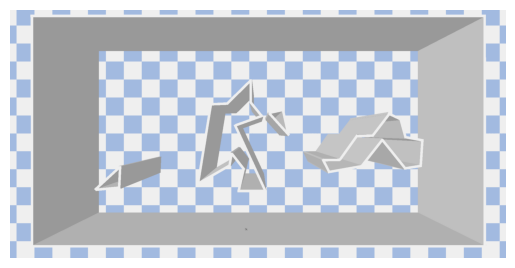

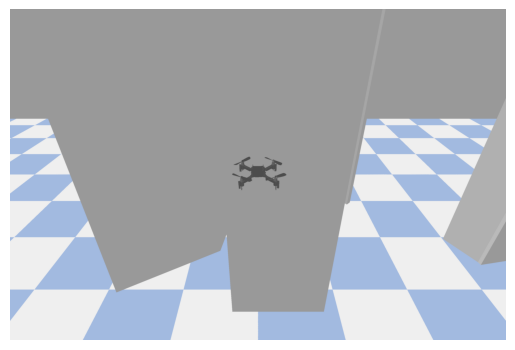

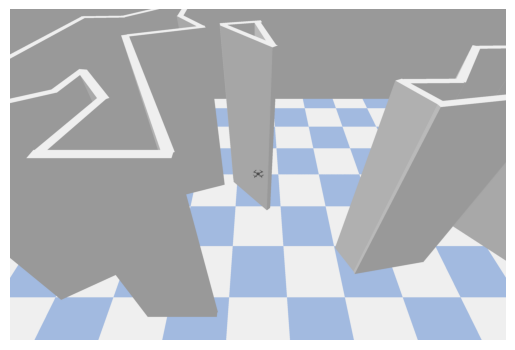

In [37]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')


!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
import os
import matplotlib.pyplot as plt
import math
import time
import csv
import gymnasium as gym
import pybullet_data

def take_photo(width, height, cameraEyePosition, cameraTargetPosition, cameraUpVector, fov, aspect, near, far):



  view_matrix=p.computeViewMatrix(cameraEyePosition, cameraTargetPosition, cameraUpVector)

  projection_matrix = p.computeProjectionMatrixFOV(fov, aspect, near, far)

  images = p.getCameraImage(width, height, view_matrix, projection_matrix, renderer=p.ER_BULLET_HARDWARE_OPENGL)

  #images = p.getCameraImage(width, height, renderer=p.ER_BULLET_HARDWARE_OPENGL)

  rgbim = Image.fromarray(images[2])

  plt.imshow(rgbim)
  plt.axis('off')
  plt.show()



p.connect(p.DIRECT) # p.direct for no visualisation, faster
p.resetSimulation()
p.setAdditionalSearchPath(pybullet_data.getDataPath())
#p.setAdditionalSearchPath("Users\User\Documents\Python Scripts")
#p.setGravity(0, 0, -9.81)
p.setRealTimeSimulation(0)
#self.geometry('{0}x{1}'.format(HEIGHT * UNIT, HEIGHT * UNIT))
#self.shapes = self.load_images()
#self.canvas = self._build_canvas()

#self.texts = []
global targid
targid = p.loadURDF (os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/cf2x.urdf"),[10, -10, 3], [0, 0, 0, 1])#, useFixedBase=True, flags=p.URDF_USE_SELF_COLLISION)
#print("targid: ", p.getBodyUniqueId(targid), ":::", p.getCollisionShapeData(1, -1))
p.resetDebugVisualizerCamera(cameraDistance=11, cameraYaw=0, cameraPitch=-89, cameraTargetPosition = [10, -8, 0])


floor = p.loadURDF("plane.urdf", [0, 0, 0], [0, 0, 0, 1]) # location, orientaton as quarternion
#targid = URDF.load("gym-pybullet-drones/gym_pybullet_drones/assets/cf2x.urdf")
#global targid
#targid = p.loadURDF (os.path.join ("pybullet RL attempts/urdfs/cf2x.urdf"),[10, -10, 3], [0, 0, 0, 1])#, useFixedBase=True, flags=p.URDF_USE_SELF_COLLISION)
#print("targid: ", p.getBodyUniqueId(targid), ":::", p.getCollisionShapeData(1, -1))
#box1 = p.loadURDF(os.path.join ("gym-pybullet-drones/gym_pybullet_drones/assets/box.urdf"),[0, 1, 1], [0, 0, 0, 1], useFixedBase=True)

#Border
wall1 = p.loadURDF(os.path.join("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall1.urdf"),[1.55, -5.95, 0],  p.getQuaternionFromEuler([0, 0, 1.571]), useFixedBase=True, flags=p.URDF_USE_SELF_COLLISION)
#print("Wall1: ", p.getBodyUniqueId(wall1), ":::", p.getCollisionShapeData(2, -1))
wall2 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall2.urdf"),[10.5, -1.37, 0],  p.getQuaternionFromEuler([0, 0, 0]), useFixedBase=True, flags=p.URDF_USE_SELF_COLLISION)
#print("Wall2: ", p.getBodyUniqueId(wall2), ":::", p.getCollisionShapeData(3, -1))
wall3 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall3.urdf"),[19.47, -5.91, 0],  p.getQuaternionFromEuler([0, 0, 1.571]), useFixedBase=True, flags=p.URDF_USE_SELF_COLLISION)
wall4 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall4.urdf"),[10.54, -10.45, 0],  p.getQuaternionFromEuler([0, 0, 0]), useFixedBase=True, flags=p.URDF_USE_SELF_COLLISION)

#Fan Fawr
wall5 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall5.urdf"),[4.53, -7.78, 0],  p.getQuaternionFromEuler([0, 0, 0.743]), useFixedBase=True)
wall6 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall6.urdf"),[5.02, -7.73, 0],  p.getQuaternionFromEuler([0, 0, 1.525]), useFixedBase=True)
wall7 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall7.urdf"),[4.56, -8.18, 0],  p.getQuaternionFromEuler([0, 0, 0.091]), useFixedBase=True)

#Craig-Gwaun-Taf
wall8 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall8.urdf"),[8.38, -6.4, 0],  p.getQuaternionFromEuler([0, 0, 1.409]), useFixedBase=True)
wall9 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall9.urdf"),[8.95, -4.84, 0],  p.getQuaternionFromEuler([0, 0, 0.041]), useFixedBase=True)
wall10 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall10.urdf"),[9.74, -4.37, 0],  p.getQuaternionFromEuler([0, 0, 0.775]), useFixedBase=True)
wall11 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall11.urdf"),[10.21, -4.33, 0],  p.getQuaternionFromEuler([0, 0, 1.571]), useFixedBase=True)
wall12 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall12.urdf"),[10.41, -5.03, 0],  p.getQuaternionFromEuler([0, 0, -0.887]), useFixedBase=True)
wall13 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall13.urdf"),[10.15, -5.49, 0],  p.getQuaternionFromEuler([0, 0, 0.341]), useFixedBase=True)
wall14 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall14.urdf"),[10.18, -6.96, 0],  p.getQuaternionFromEuler([0, 0, -1.137]), useFixedBase=True)
wall15 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall15.urdf"),[10.25, -8.27, 0],  p.getQuaternionFromEuler([0, 0, 0]), useFixedBase=True)
wall16 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall16.urdf"),[9.83, -7.83, 0],  p.getQuaternionFromEuler([0, 0, 1.347]), useFixedBase=True)
wall17 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall17.urdf"),[9.71, -7.12, 0],  p.getQuaternionFromEuler([0, 0, -0.908]), useFixedBase=True)
wall18 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall18.urdf"),[9.41, -7.03, 0],  p.getQuaternionFromEuler([0, 0, 1.403]), useFixedBase=True)
wall19 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall19.urdf"),[8.74, -7.63, 0],  p.getQuaternionFromEuler([0, 0, 0.521]), useFixedBase=True)

#Cribyn
wall20 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall20.urdf"),[11.23, -5.13, 0],  p.getQuaternionFromEuler([0, 0, 0.212]), useFixedBase=True)
wall21 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall21.urdf"),[11.59, -5.56, 0],  p.getQuaternionFromEuler([0, 0, -1.352]), useFixedBase=True)
wall22 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall22.urdf"),[11.34, -5.65, 0],  p.getQuaternionFromEuler([0, 0, -0.834]), useFixedBase=True)

#Gwaun Cerrig Llwydion
wall23 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall23.urdf"),[14.08, -6.56, 0],  p.getQuaternionFromEuler([0, 0, 0.949]), useFixedBase=True)
wall24 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall24.urdf"),[14.72, -6.1, 0],  p.getQuaternionFromEuler([0, 0, 0.03]), useFixedBase=True)
wall25 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall25.urdf"),[15.35, -5.68, 0],  p.getQuaternionFromEuler([0, 0, 0.915]), useFixedBase=True)
wall26 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall26.urdf"),[15.9, -5.33, 0],  p.getQuaternionFromEuler([0, 0, -0.441]), useFixedBase=True)
wall27 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall27.urdf"),[16.24, -5.81, 0],  p.getQuaternionFromEuler([0, 0, -1.305]), useFixedBase=True)
wall28 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall28.urdf"),[16.66, -6.21, 0],  p.getQuaternionFromEuler([0, 0, -0.184]), useFixedBase=True)
wall29 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall29.urdf"),[16.97, -6.75, 0],  p.getQuaternionFromEuler([0, 0, 1.505]), useFixedBase=True)
wall30 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall30.urdf"),[16.63, -7.33, 0],  p.getQuaternionFromEuler([0, 0, 0.156]), useFixedBase=True)
wall31 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall31.urdf"),[15.87, -6.82, 0],  p.getQuaternionFromEuler([0, 0, -0.891]), useFixedBase=True)
wall32 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall32.urdf"),[15.01, -6.77, 0],  p.getQuaternionFromEuler([0, 0, 0.903]), useFixedBase=True)
wall33 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall33.urdf"),[13.94, -7.41, 0],  p.getQuaternionFromEuler([0, 0, 0.175]), useFixedBase=True)
wall34 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall34.urdf"),[13.19, -7.28, 0],  p.getQuaternionFromEuler([0, 0, -1.1]), useFixedBase=True)
wall35 = p.loadURDF(os.path.join ("drive/My Drive/ColabNotebooks/5qlearning/urdfs/Brecon/Wall35.urdf"),[13.42, -7.05, 0],  p.getQuaternionFromEuler([0, 0, 0.015]), useFixedBase=True)

fov = 60
aspect=2
near = 0.02
far = 15

p.resetBasePositionAndOrientation(p.getBodyUniqueId(targid), [10, -10, 3], [0, 0, 0, 1])
position , _ =p.getBasePositionAndOrientation(targid)
p.stepSimulation()
take_photo(2048, 1024, [10.5, -6, 12], [10.5, -6, 0], [0, 1, 0], fov, aspect, near, far)
focus_position , _ =p.getBasePositionAndOrientation(targid)#returns position and oreintation hence weird syntax at start
p.resetDebugVisualizerCamera(cameraDistance=1, cameraYaw=0, cameraPitch=-45, cameraTargetPosition = focus_position)

fov = 60
aspect=1.5
near = 0.02
far = 10


p.stepSimulation()
take_photo(int(2048*aspect), 2048, [10, -10.5, 3.3], position, [0, 1, 0], fov, aspect, near, far)

far = 15

p.resetBasePositionAndOrientation(p.getBodyUniqueId(targid), [11.5, -8, 3], [0, 0, 0, 1])
p.stepSimulation()
position , _ =p.getBasePositionAndOrientation(targid)
take_photo(int(2048*aspect), 2048, [11.5, -10, 5], position, [0, 1, 0], fov, aspect, near, far)




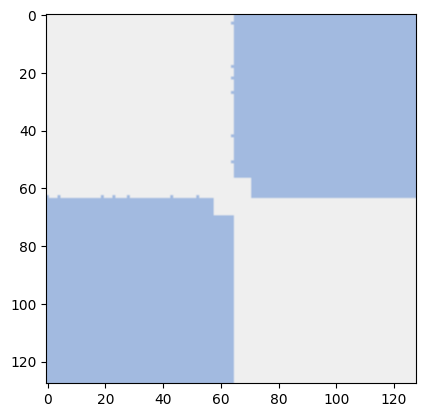

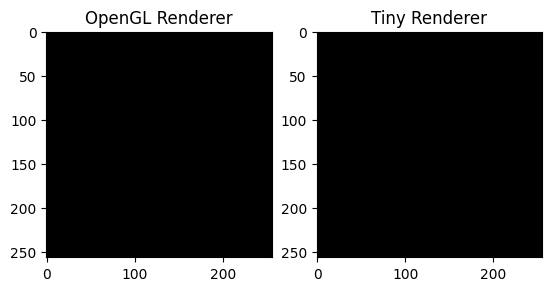

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pybullet as p
import pybullet_data as pd
from PIL import Image

p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
p.loadURDF('plane.urdf')
p.loadURDF('cube_small.urdf', basePosition=[0.0, 0.0, 0.025])

width = 128
height = 128

fov = 60
aspect = width / height
near = 0.02
far = 1

nnn=2

view_matrix = p.computeViewMatrix([0, 0, 0.5], [0, 0, 0], [1, 0, 0])
projection_matrix = p.computeProjectionMatrixFOV(fov, aspect, near, far)

# Get depth values using the OpenGL renderer
images = p.getCameraImage(width, height, view_matrix, projection_matrix, renderer=p.ER_BULLET_HARDWARE_OPENGL)

rgbim = Image.fromarray(images[nnn])

plt.imshow(rgbim)
plt.show()

depth_buffer_opengl = np.reshape(images[nnn], [width*2, height*2])
depth_opengl = far * near / (far - (far - near) * depth_buffer_opengl)

# Get depth values using Tiny renderer
images = p.getCameraImage(width, height, view_matrix, projection_matrix, renderer=p.ER_TINY_RENDERER)
depth_buffer_tiny = np.reshape(images[nnn], [width*2, height*2])
depth_tiny = far * near / (far - (far - near) * depth_buffer_tiny)

p.disconnect()

# Plot both images - should show depth values of 0.45 over the cube and 0.5 over the plane
plt.subplot(1, 2, 1)
plt.imshow(depth_opengl, cmap='gray', vmin=0, vmax=1)
plt.title('OpenGL Renderer')

plt.subplot(1, 2, 2)
plt.imshow(depth_tiny, cmap='gray', vmin=0, vmax=1)
plt.title('Tiny Renderer')

plt.show()

In [ ]:
IMG_SIZE=224
far=10
near=1

img = p.getCameraImage(224, 224, shadow = False, renderer=p.ER_BULLET_HARDWARE_OPENGL)
rgb_opengl = (np.reshape(img[2], (IMG_SIZE, IMG_SIZE, 4)))
depth_buffer_opengl = np.reshape(img[3], [IMG_SIZE, IMG_SIZE])
depth_opengl = far * near / (far - (far - near) * depth_buffer_opengl)
seg_opengl = np.reshape(img[4], [IMG_SIZE, IMG_SIZE]) * 1. / 255.

rgbim = Image.fromarray(rgb_opengl)
rgbim_no_alpha = rgbim.convert('RGB')

#rgbim_no_alpha.save('dataset/'+obj_name+'/'+ obj_name +'_rgb_'+str(counter)+'.jpg')
plt.imshow(depth_buffer_opengl)
#plt.imsave('dataset/'+obj_name+'/'+ obj_name+'_depth_'+str(counter)+'.jpg', depth_buffer_opengl)
plt.show()